No of Features: 561
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: Activity, dtype: int64
We have 0 NaN/Null values in train


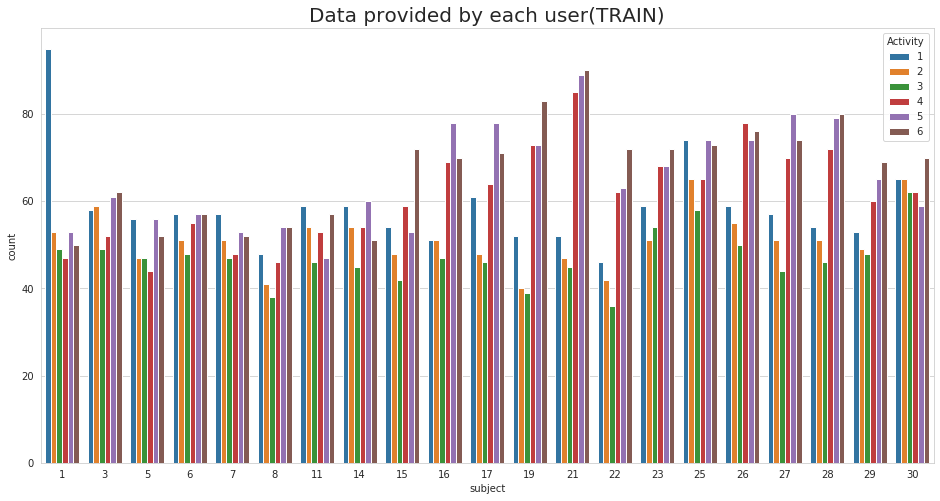

In [2]:

9
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


features = list()
with open('/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


df= pd.read_csv('/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
df = df.loc[:,~df.columns.duplicated()]
X_train=df
X_train.sample()

X_train['subject'] = pd.read_csv('/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', header=None)

y_train = pd.read_csv('/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',names=["Activity"])


X_train['Activity']=y_train

print(X_train['Activity'].value_counts())

print('We have {} NaN/Null values in train'.format(X_train.isnull().values.sum()))


sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user(TRAIN)', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = X_train)
plt.show()

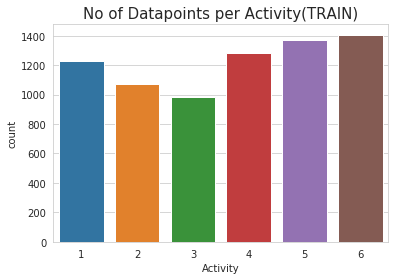

In [3]:
plt.title('No of Datapoints per Activity(TRAIN)', fontsize=15)
sns.countplot(X_train.Activity)
plt.show()

In [4]:
#TEST DATA
dft= pd.read_csv('/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
dft = dft.loc[:,~dft.columns.duplicated()]
X_test=df
X_test.sample()

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,subject,Activity
856,0.274824,-0.027216,-0.090544,-0.995618,-0.973135,-0.967453,-0.995909,-0.972722,-0.965319,-0.939552,...,-0.733025,-0.007988,0.080741,-0.363557,-0.77995,-0.85135,0.079753,-0.089565,5,5


In [5]:
X_test['subject'] = pd.read_csv('/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', header=None)

y_test = pd.read_csv('/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',names=["Activity"])

In [8]:
X_test['Activity']=y_test

print(X_test['Activity'].value_counts())
print(X_test.columns[X_test.isnull().any()].tolist())

print('We have {} NaN/Null values in test'.format(X_test.isnull().values.sum()))
print("No. of columns containing null values")
print(len(X_test.columns[X_test.isna().any()]))
X_test=X_test.dropna()



6.0    537
5.0    532
1.0    496
4.0    491
2.0    471
3.0    420
Name: Activity, dtype: int64
['subject', 'Activity']
We have 0 NaN/Null values in test
No. of columns containing null values
0


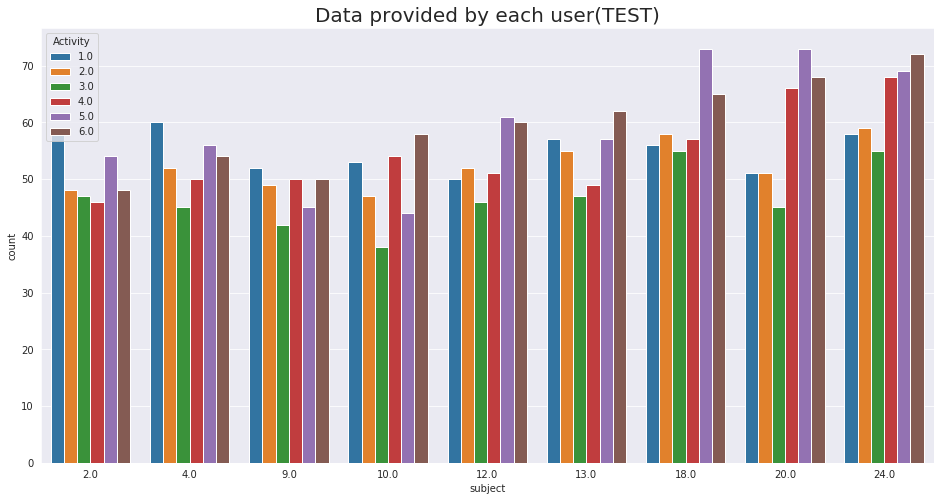

In [9]:
sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user(TEST)', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = X_test)
plt.show()

In [11]:
X_test['subject'].value_counts()

24.0    381
18.0    364
20.0    354
13.0    327
12.0    320
4.0     317
2.0     302
10.0    294
9.0     288
Name: subject, dtype: int64

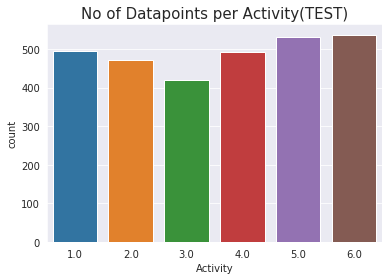

In [12]:
plt.title('No of Datapoints per Activity(TEST)', fontsize=15)
sns.countplot(X_test.Activity)
plt.show()

In [13]:
from sklearn.manifold import TSNE

In [14]:

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.271s...
[t-SNE] Computed neighbors for 7352 samples in 51.395s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 124.7668381, gradient norm = 0.0270634 (50 iterations in 5.228s)
[t-SNE] Iteration 100: error = 107.1877747, gradient norm = 0.0246395 (50 iterations in

/home/akshayaksh/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


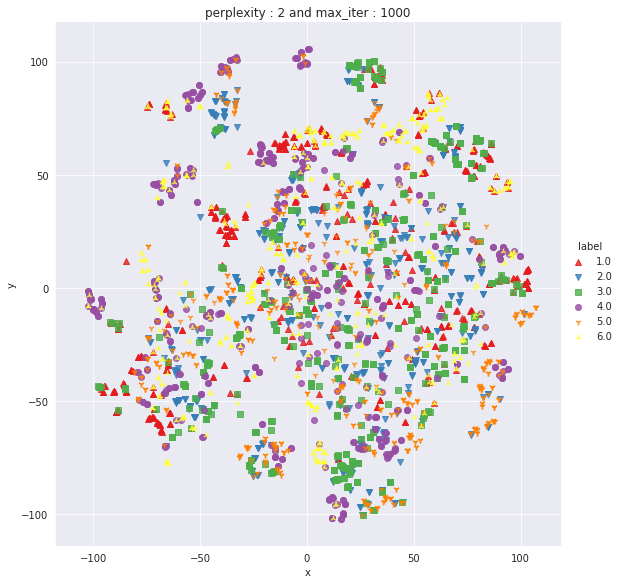

Done

performing tsne with perplexity 30 and with 1000 iterations at max
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.193s...
[t-SNE] Computed neighbors for 7352 samples in 55.174s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348516
[t-SNE] Computed conditional probabilities in 0.516s
[t-SNE] Iteration 50: error = 92.2335129, gradient norm = 0.0240178 (50 iterations in 6.471s)
[t-SNE] Iteration 100: error = 80.4219131, gradient norm = 0.0054949 (50 iteratio

/home/akshayaksh/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


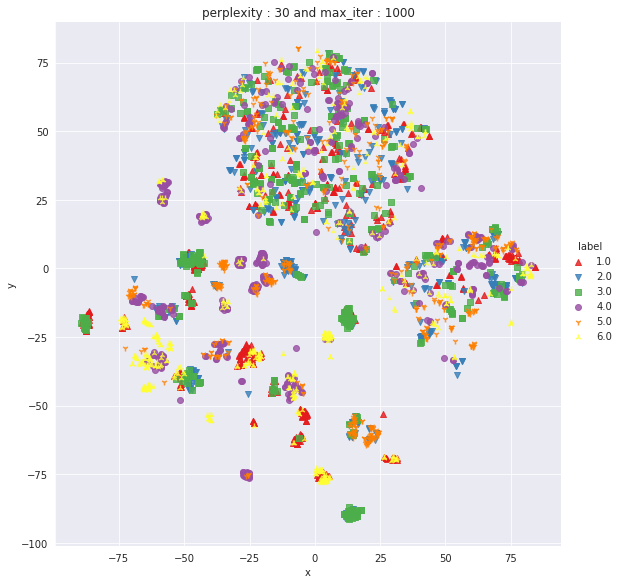

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.172s...
[t-SNE] Computed neighbors for 7352 samples in 60.304s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.748s
[t-SNE] Iteration 50: error = 85.6754913, gradient norm = 0.0284720 (50 iterations in 5.460s)
[t-SNE] Iteration 100: error = 75.4546814, gradient norm = 0.0047919 (50 iterati

/home/akshayaksh/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


saving this plot as image in present working directory...


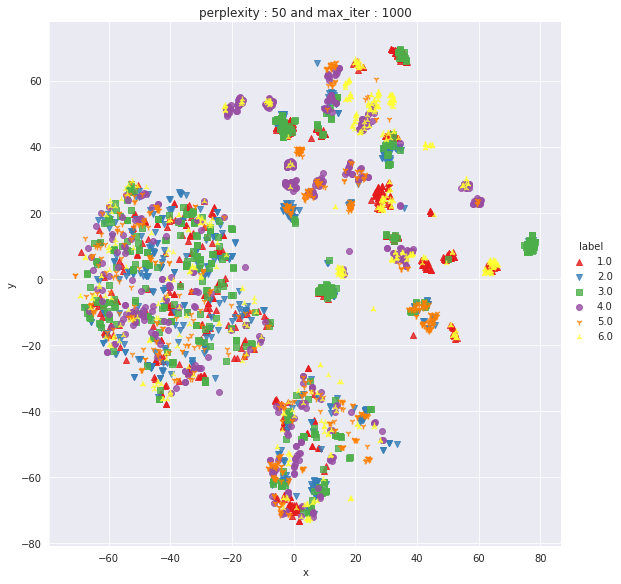

Done


In [15]:
X_pre_tsne = X_train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = X_train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,30,50])

[ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]
(347, 128, 9) (347, 1)


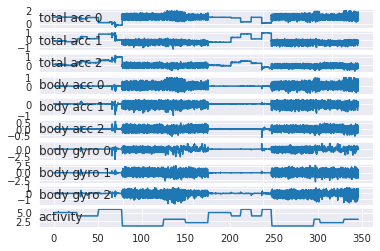

In [22]:
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot
 
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]
 
# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series
 
# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()
 
# load data
trainX, trainy = load_dataset('train', '/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/')
# load mapping of rows to subjects
sub_map = load_file('/home/akshayaksh/Desktop/INTERNSHIP/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print(train_subjects)
# get the data for one subject
sub_id = train_subjects[0]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)